<a href="https://colab.research.google.com/github/Justinezgh/SBI-Diff-Simulator/blob/add-lv-script/SBI-Diff-Simulator/results/lotka_volterra/Plots_results_lotka_volterra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import arviz as az
import matplotlib.pyplot as plt
az.style.use("arviz-darkgrid")
import numpy as np 
import pandas as pd

In [4]:
c2st_without_score = pd.read_table("/content/c2st_metric_without_score.tsv")
nlp_without_score = pd.read_table("/content/neg_log_prob_without_score.tsv")

c2st_with_score = pd.read_table("/content/c2st_metric_with_score.tsv")
nlp_with_score = pd.read_table("/content/neg_log_prob_with_score.tsv")

#c2st_with_5e7score = pd.read_table("/content/c2st_metric_with_8e8score.tsv")
#nlp_with_5e7score = pd.read_table("/content/neg_log_prob_with_8e8score.tsv")

In [6]:
c2st_without_score = c2st_without_score[['n_simulations','c2st_metric_mean']]
mean_c2st_without_score = np.array(c2st_without_score.groupby(by=['n_simulations']).mean()['c2st_metric_mean'])
std_c2st_without_score = np.array(c2st_without_score.groupby(by=['n_simulations']).std()['c2st_metric_mean'])

nlp_without_score = nlp_without_score[['n_simulations','nlp']]
mean_nlp_without_score = np.array(nlp_without_score.groupby(by=['n_simulations']).mean()['nlp'])
std_nlp_without_score = np.array(nlp_without_score.groupby(by=['n_simulations']).std()['nlp'])

c2st_with_score = c2st_with_score[['n_simulations','c2st_metric_mean']]
mean_c2st_with_score = np.array(c2st_with_score.groupby(by=['n_simulations']).mean()['c2st_metric_mean'])
std_c2st_with_score = np.array(c2st_with_score.groupby(by=['n_simulations']).std()['c2st_metric_mean'])

nlp_with_score = nlp_with_score[['n_simulations','nlp']]
mean_nlp_with_score = np.array(nlp_with_score.groupby(by=['n_simulations']).mean()['nlp'])
std_nlp_with_score = np.array(nlp_with_score.groupby(by=['n_simulations']).std()['nlp'])


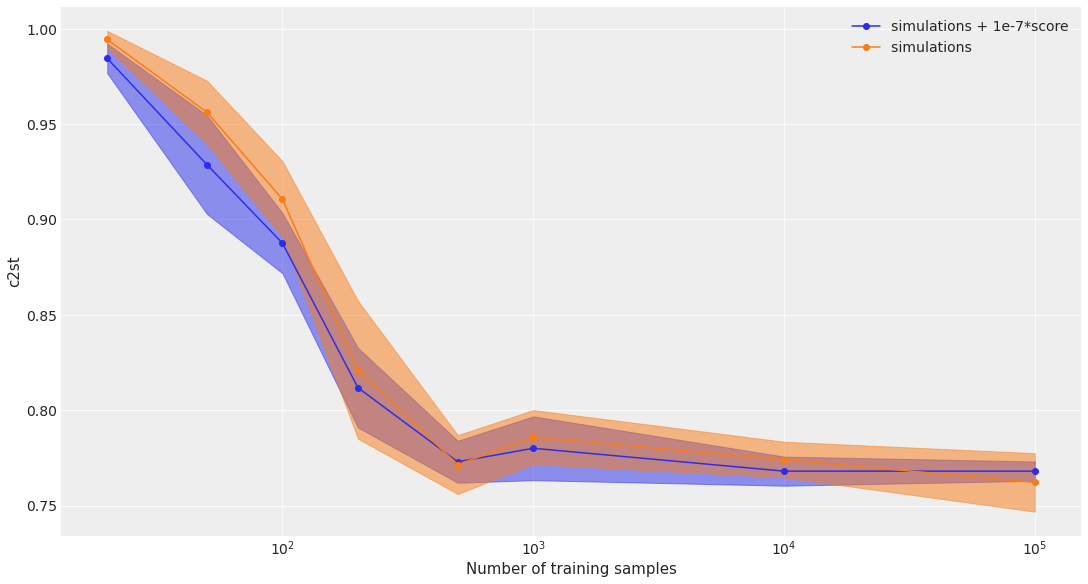

In [7]:
x = [20,50,100,200,500,1000,10000,100000]

plt.figure(figsize=(15,8))
plt.plot(x, mean_c2st_with_score, c = 'C0', marker = 'o', label = 'simulations + 1e-7*score')
plt.fill_between(x,mean_c2st_with_score - std_c2st_with_score, mean_c2st_with_score + std_c2st_with_score,  color = 'C0', alpha = 0.5)
plt.plot(x, mean_c2st_without_score, c = 'C1', marker = 'o', label = 'simulations ')
plt.fill_between(x,mean_c2st_without_score - std_c2st_without_score, mean_c2st_without_score + std_c2st_without_score,  color = 'C1', alpha = 0.5)
plt.ylabel('c2st')
plt.xscale('log')
plt.xlabel('Number of training samples')
plt.legend()

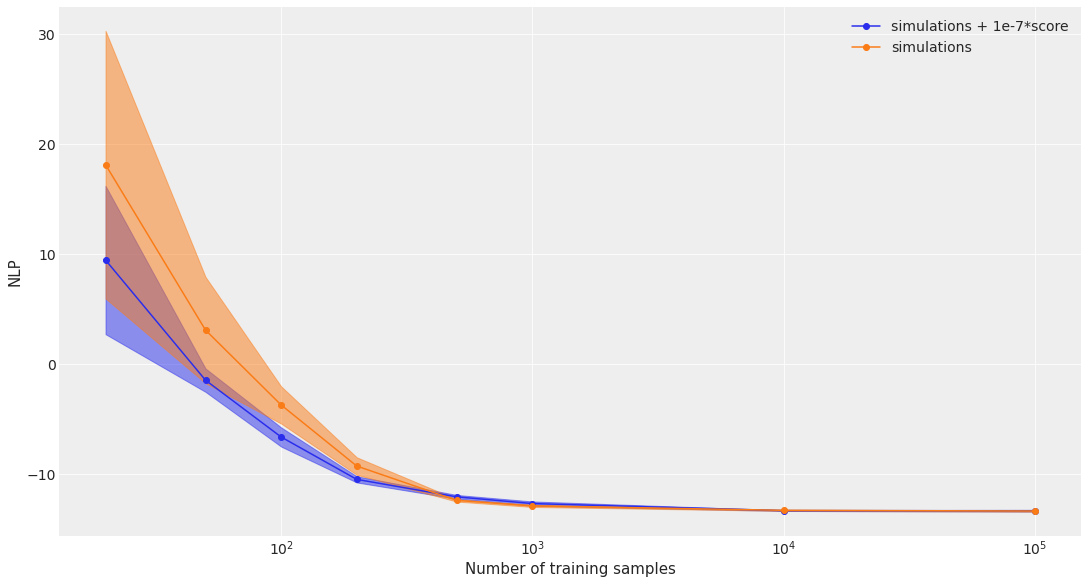

In [8]:
x = [20,50,100,200,500,1000,10000,100000]
plt.figure(figsize=(15,8))
plt.plot(x, mean_nlp_with_score, c = 'C0', marker = 'o', label = 'simulations + 1e-7*score')
plt.fill_between(x,mean_nlp_with_score - std_nlp_with_score, mean_nlp_with_score + std_nlp_with_score,  color = 'C0', alpha = 0.5)
plt.plot(x, mean_nlp_without_score, c = 'C1', marker = 'o', label = 'simulations')
plt.fill_between(x,mean_nlp_without_score - std_nlp_without_score, mean_nlp_without_score + std_nlp_without_score,  color = 'C1', alpha = 0.5)
plt.ylabel('NLP')
plt.xlabel('Number of training samples')
plt.xscale('log')
plt.legend()